# Inferential statistics II - Bootstrapping

## Introduction

In the previous exercises you performed frequentist calculations to perform inference from a sample of data. Such inference relies on theory largely developed from the 19th Century onwards that is subject to certain assumptions or theoretical limits. These are fine if those assumptions hold in your case, and what you want to do has a known theoretical distribution, for example the mean of a sampling distribution that we looked at.

In these exercises we are once again going to load in the medical charge data but this time we are going to make inferences about the population using bootstrapping, that is simulating repeated re-runs of an experiment. If frequentism is about using assumptions and theoretical results to calculate what we expect to happen were an experiment to be run again and again and again, then bootstrapping is about using computing power to essentially re-run the sample draw again and again and again to see what actually happens.

## Prerequisites

Whilst these exercises do not strictly depend on these concepts, before working through them, you should have completed the preceding assignment and have a good understanding of such frequentist concepts as
* the _z_-statistic
* the _t_-statistic
* the difference and relationship between the two
* the Central Limit Theorem, its assumptions and consequences
* how to estimate the population mean and standard deviation from a sample
* the concept of a sampling distribution of a test statistic, particularly for the mean
* how to combine these concepts to calculate confidence intervals and p-values
* how those confidence intervals and p-values allow you to perform hypothesis (or A/B) tests

To complete these exercises, you should have covered the material on how to calculate bootstrap replicates of summary statistics. Having an appreciation of what confidence intervals and p-values are will be helpful.

In [1]:
import pandas as pd
import numpy as np
from numpy.random import seed
import matplotlib.pyplot as plt
import scipy.stats as sp

## Medical charge data set

In [2]:
med = pd.read_csv('data/insurance2.csv')

In [3]:
med.head()

,age,sex,bmi,children,smoker,region,charges,insuranceclaim
0,19,0,27.900,0,1,3,16884.92400,1
1,18,1,33.770,1,0,2,1725.55230,1
2,28,1,33.000,3,0,2,4449.46200,0
3,33,1,22.705,0,0,1,21984.47061,0
4,32,1,28.880,0,0,1,3866.85520,1


In the previous assignment, you used the frequentist approach to estimate the lower limit for the 95% confidence interval on the mean hospital charge. This approach relies on statistical theory that has been developed over the years and is also limited to statistics for which theoretical results on the sampling distribution exist. These results are remarkably useful and applicable much of the time and under a surprisingly wide range of conditions.

Having calculated the 95% lower confidence interval using frequentist theory in the previous exercise, you would like to verify your calculations and check you get consistent results without making the assumptions required before. After all, the distribution of charges really was very non-normal.

__Q:__ Use bootstrap sampling to estimate the same 95% confidence interval lower limit as before.

__A:__

In [4]:
np.random.seed(47)
N_rep = 10000

def bsreps(data, func=np.mean, size=10000):
    sample = np.empty(size)
    
    for i in range(size):
        sample[i] = func(np.random.choice(data, len(data), replace=True))
    return sample

bsmean = bsreps(med.charges, np.mean, N_rep)

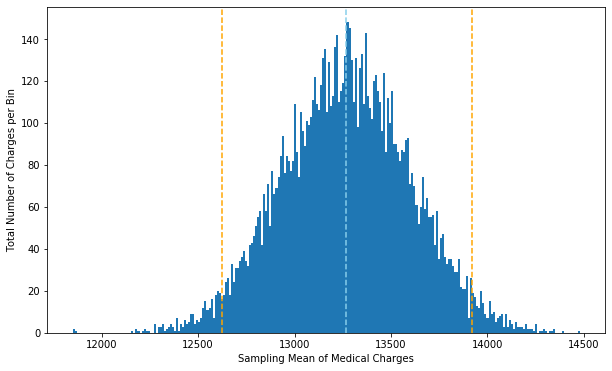

In [5]:
n_bins = int(np.sqrt(len(bsmean)))

fig, axes = plt.subplots(figsize=(10,6))
_ = plt.hist(bsmean, bins=250)
_ = plt.axvline(np.percentile(bsmean, 2.5), linestyle="--", c="orange") #2.5%
_ = plt.axvline(np.mean(bsmean), linestyle="--", c="skyblue") #mean
_ = plt.axvline(np.percentile(bsmean, 97.5), linestyle="--", c="orange") #97.5%
_ = plt.xlabel("Sampling Mean of Medical Charges")
_ = plt.ylabel("Total Number of Charges per Bin")

In [6]:
print(np.mean(bsmean))
print(np.percentile(bsmean, [2.5, 97.5]))
print(sp.percentileofscore(bsmean, np.percentile(bsmean, 2.5)))

13268.292567069491
[12624.86211913 13918.00929997]
2.5


If you performed 10000 replicates immediately after setting the random seed to 47, you should get the value 12724 here, which compares very well with the value 12725 obtained using the _t_-distribution confidence interval previously. It is a most pleasant result to see the predictions of classical frequentist theory match with results that are now possible through the number-crunching ability of computers.

Remember in the previous exercise set, we saw there are two ways of performing a _t_-test from a sample, depending on whether we can assume the groups have equal variance or not. We can actually easily test this using the bootstrap!

## Joe's Comments

I should get 12,724? How about 12,624.8? Could it be a coincidence that the supposed answer is basically 100 units different from my answer? What's the probability of Springboard having a typo in their copy vs. the probability of me not completing the exercise correctly? We'll see I guess.
<br><br>
Wait. We are comparing this answer to the one from the previous assignment? Okay, that makes sense, but I'm guessing the seed for that assignment should also be set to 47? That wasn't mentioned in that assignment. Was that ommitted, or doesn't it matter? I'm a bit skeptical because these assignments are being completed by actual students for the first time this week, and as I've been working on them I've noticed a few typos, and even entire markdown boxes that seem like they should have been deleted). 
<br><br>
Regardless, after setting the previous assignment's seed to 47 and running the calculations again, my previous result is now (drumroll) 12628.00199572, which is fairly comparable to the answer suggested in this document of 12725 (assuming we're off by 100 for some reason). This was obtained using np.percentile(bs_means, [100-99.988, 99.988]), which is what I'm more comfortable using as this was discussed numerous times in the Datacamp course. The t-statistic and other t functions were not discussed, and I feel like I'm not using them correctly. 
###    

__Q:__ Calculate the 95% confidence interval for the difference between the standard deviations of insurance and non-insurance claim charges (insured - non-insured). Calculate the differences over 10000 replicates. Plot the histogram of values and mark the locations of the percentiles. State the null and alternative hypothesis and comment on whether you would retain or reject the null hypothesis in this case and why.

__A:__

## Difference in Standard Deviation of Insured and Uninsured

We will assume:<br>
Ho: The Standard Deviation is the same whether or not people have insurance.<br>
Ha: The Standard Deviation is different depending on whether people have insurance or not.<br>

Let's do a permutation test of the samples. We will concatenate both groups, generate bootstrap permutations of them, and divide the permuted samples into two groups. We will then calculate the difference of the means between our permuted groups and compare it with the observed difference in standard deviation of both groups (7596.256). Under our Ho, we will expect to see the difference of our bootstraps to be greater than or equal to the 7596.26. Alpha is .05.

In [7]:
# Are there nulls?
med.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 8 columns):
age               1338 non-null int64
sex               1338 non-null int64
bmi               1338 non-null float64
children          1338 non-null int64
smoker            1338 non-null int64
region            1338 non-null int64
charges           1338 non-null float64
insuranceclaim    1338 non-null int64
dtypes: float64(2), int64(6)
memory usage: 83.7 KB


In [8]:
# make groups from the insured and uninsured, more readable than before
insured = med[med.insuranceclaim == 1].charges
uninsured = med[med.insuranceclaim == 0].charges

In [9]:
# calculate the mean and sd of the new groups
mean_insured = np.mean(insured)
std_insured = np.std(insured)

mean_uninsured = np.mean(uninsured)
std_uninsured = np.std(uninsured)

In [10]:
# compare std (of the charges) for the entire dataset, the insured mean, and uninsured mean
np.std(med.charges), std_insured, std_uninsured

(12105.484975561612, 14036.956250260417, 6440.699841605235)

In [11]:
# difference in standard deviation of amount charged for insured vs uninsured
emperical_diff_std = std_insured - std_uninsured
emperical_diff_std

# The Standard Deviation of insured people is almost $7600 more than uninsured people

7596.256408655182

In [12]:
def permutation_sample(data1, data2):
    """Generate a permutation sample from two data sets."""

    # Concatenate the data sets: data
    data = np.concatenate((data1, data2))

    # Permute the concatenated array: permuted_data
    permuted_data = np.random.permutation(data)

    # Split the permuted array into two: perm_sample_1, perm_sample_2
    perm_sample_1 = permuted_data[:len(data1)]
    perm_sample_2 = permuted_data[len(data1):]

    return perm_sample_1, perm_sample_2


def draw_perm_reps(data_1, data_2, func, size=1):
    """Generate multiple permutation replicates."""

    # Initialize array of replicates: perm_replicates
    perm_replicates = np.empty(size)

    for i in range(size):
        # Generate permutation sample
        perm_sample_1, perm_sample_2 = permutation_sample(data_1, data_2)

        # Compute the test statistic
        perm_replicates[i] = func(perm_sample_1, perm_sample_2)

    return perm_replicates

def diff_of_std(data_1, data_2):
    """Difference in std of two arrays."""

    # The difference of std of data_1, data_2: diff
    diff = np.std(data_1) - np.std(data_2)

    return diff

In [13]:
# Compute the observed difference in std of insured and uninsured
coverage_diff_obs = diff_of_std(insured, uninsured)

# Acquire 10,000 permutation replicates of difference in std between insured and uninsured
perm_replicates = draw_perm_reps(insured, uninsured, diff_of_std, 10000)

# Compute and print the p-value: p
p = np.sum(perm_replicates >= coverage_diff_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


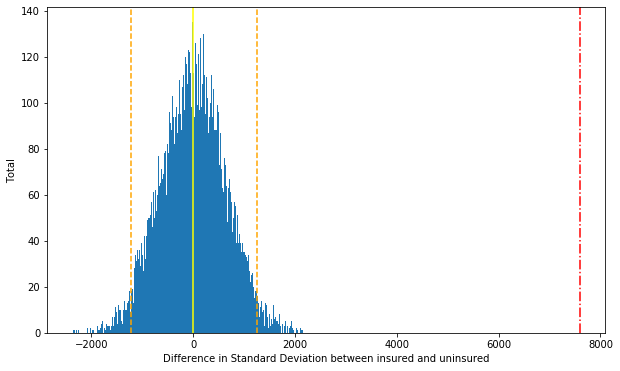

In [15]:
n_bins = int(np.sqrt(len(perm_replicates)))

fig, axes = plt.subplots(figsize=(10,6))
_ = plt.hist(perm_replicates, bins=250)
_ = plt.axvline(np.percentile(perm_replicates, 2.5), linestyle="--", c="orange") #2.5%
_ = plt.axvline(np.mean(perm_replicates), linestyle="-", c="yellow") #mean
_ = plt.axvline(np.percentile(perm_replicates, 97.5), linestyle="--", c="orange") #97.5%
_ = plt.axvline(emperical_diff_std, linestyle="-.", c="red") #empirical difference

_ = plt.xlabel("Difference in Standard Deviation between insured and uninsured")
_ = plt.ylabel("Total")

In [17]:
np.percentile(perm_replicates, [2.5, 97.5]), np.mean(perm_replicates), emperical_diff_std

(array([-1224.80955756,  1248.52022784]), 4.665029890169376, 7596.256408655182)

## Results

We do not generate a single replicate with a magnitude of more than 7596.256. We can reject the Ho that the Standard Deviation of both groups is the same.

# Whoa there, folks!!! Mistake in the copy! ??!?!
In the next section Springboard states that "a Type II error (where we wrongly reject the null hypothesis, and it is, instead, true)". <br><br>
Here's the definition of Type I and Type II error from Wikipedia:<br>
In statistical hypothesis testing, a type I error is the rejection of a true null hypothesis, while a type II error is retaining a false null hypothesis.<br><br>
It's not ideal when I'm struggling with the concepts presented in this document, and I'm unable to trust the accuracy of this document.

## Confidence interval and p-value

The confidence interval above is often a useful quantity to estimate. If we wish to limit our expected probability of making a Type II error (where we wrongly reject the null hypothesis, and it is, instead, true) to $\alpha$, the associated confidence interval is our estimate of the interval within which we expect the true population value to be found $100\times(1 - \alpha)$% of the time we do this test. In the above we performed bootstrap replicates to estimate the interval and reject the null hypothesis if this interval did not contain zero. You will sometimes see such an interval reported in the output of statistical functions.

The partner of the confidence interval is the p-value. The p-value and the confidence interval are linked through our choice of $\alpha$. The p-value tells us how likely it is, under the null hypothesis, to get an outcome at least as extreme as what was observed. If this fails to reach the level of our _pre-specified_ $\alpha$, we decide the null hypothesis is sufficiently unlikely to be true and thus reject it. To calculate this p-value via the bootstrap, we have to put ourselves in a position where we are simulating the null hypothesis being true and then calculate the fraction of times we observe a result at least as extreme as that actually observed.

Remember how, previously, you used the _t_-test to calculate the p-value for the observed difference between the means of insured and non-insured medical cases. We're now going to repeat this but using the bootstrap.

__Q:__ Perform a bootstrapped hypothesis test at the 5% significance level ($\alpha = 0.05$) to calculate the p-value of the observed difference between insurance and non-insurance charges, state your null and alternative hypotheses and whether you retain or reject the null hypothesis for the given significance level.

__A:__

This was already done above. I'll paste it below for completeness...

In [21]:
# Compute and print the p-value: p
p = np.sum(perm_replicates >= coverage_diff_obs) / len(perm_replicates)
print('p-val =', p)

p-val = 0.0


__Q:__ To put the above result in perspective, plot the histogram of your bootstrapped differences along with lines marking the locations of the observed difference. (Why would we plot more than one line, given that we only have one observed difference?)

__A:__ I'll paste the code from above below. I'm guessing the "lines" we are referring to would be for the positive and negative values for the observed value. I'll add the negative value to the below hist.

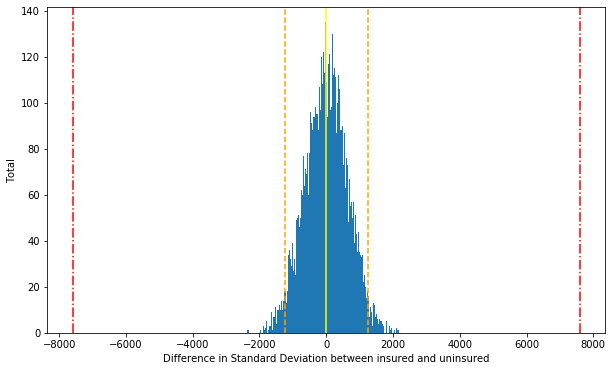

In [23]:
n_bins = int(np.sqrt(len(perm_replicates)))

fig, axes = plt.subplots(figsize=(10,6))
_ = plt.hist(perm_replicates, bins=250)
_ = plt.axvline(np.percentile(perm_replicates, 2.5), linestyle="--", c="orange") #2.5%
_ = plt.axvline(np.mean(perm_replicates), linestyle="-", c="yellow") #mean
_ = plt.axvline(np.percentile(perm_replicates, 97.5), linestyle="--", c="orange") #97.5%
_ = plt.axvline(emperical_diff_std, linestyle="-.", c="red") #empirical difference
_ = plt.axvline(-emperical_diff_std, linestyle="-.", c="red") #negative empirical difference

_ = plt.xlabel("Difference in Standard Deviation between insured and uninsured")
_ = plt.ylabel("Total")

__Q:__ Compare your p-value above with that obtained using the _t_-test function in the previous assignment. Do you think you would want to try to perform enough bootstrap replicates to observe a random difference as large as that we did observe?

__A:__ Previous t-value: pvalue=4.461230231620717e-31 (although I'm not 100% sure it's correct). Assuming it's correct I would need to generate something like 4.46 x 10^31 replicates. So, no I don't want to perform that many simluations.

__Q:__ Remember the two variants of the _t_-test we performed in the previous assignment. Which one would you use now?

__A:__ equal_var=True????????? <br>scipy.stats.ttest_ind(ins, uni, equal_var=True)

__Q:__ If, instead of being asked whether the means of two groups were different, you were working with an ad-recommender team who wanted to release a new recommendation algorithm, and you were looking at click-through rate both for the current algorithm (call it A) and from trials of their new algorithm (call it B), would you perform a two-sided test as above? What would be your null and alternative hypotheses and what would be the real world consequence of rejecting the null hypothesis?

__A:__ <br>From way above: "Calculate the 95% confidence interval for the difference between the standard deviations of insurance and non-insurance claim charges (insured - non-insured)."<br>
From directly above: "If, instead of being asked whether the means of two groups were different,"<br><br>
Was I supposed to find the difference of the means? That would have been way easier. Did I read this incorrectly, or was it supposed to say something else? Not only am I confused, but I've lost all confidence in this document at this point.<br><br>
Anyway, to the answer the question, no, I would do a one-sample test and set the mean of A to the mean of B. Ho: mean of A is acutally the mean of B. Ha: the new algorithm is having an effect. Then I'd want to compute the fraction of replicates that are <= to the mean of A. Rejecting Ho would mean that the new algorithm should be used.

# Learning outcomes

You've previously applied frequentist methods to calculate confidence intervals, p-values, and perform hypothesis tests. Frequentist methods use theoretical results to calculate what we expect would happen if experiments were to be run again and again and again. Now you've seen how you can do the same things using the bootstrap approach, which does not rely on such theory, and attendant assumptions, but instead literally does run experiments again and again and again.

In these exercises, you have
* calculated the same confidence interval lower limit as you did previously
* tested the assumption that the variances of the two groups (insured vs. non-insured) were equal - something a bit harder to do using the frequentist method because of the nature of the sampling distribution for variance
* calculated the p-value for the difference between the means of the two groups and compared with the result obtained using the previous frequentist approach

You are now well equipped to apply the bootstrap approach to a wide variety of problems. Just think about what conditions you wish to recreate in your simulated reruns.